In [ ]:
import os
import re
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt

In [33]:
rootdir = "datasets/405"
regex_find = re.compile('(.*csv$)|(.*jpg$)')
jpg_list = []
csv_list = []

for root, dirs, files in os.walk(rootdir):
    for file in files:
        if regex.match(file):
            temp = os.path.splitext(file)
            if temp[1] == '.jpg':
                name = temp[0] + temp[1]
                clean_name = temp[0].strip() + temp[1]
                if name != clean_name:
                    os.rename(rootdir+'/'+name, rootdir+'/'+clean_name)
                jpg_list.append(temp[0])
            else: csv_list.append(temp[0])

for x in jpg_list:
    if x not in csv_list:
        print(f'Отсутствует csv для {x}.jpg')

for x in csv_list:
    if x not in jpg_list:
        print(f'Отсутствует jpg для {x}.csv')

pairs_list = list(set(jpg_list) & set(csv_list))

Отсутствует csv для 240493.jpg


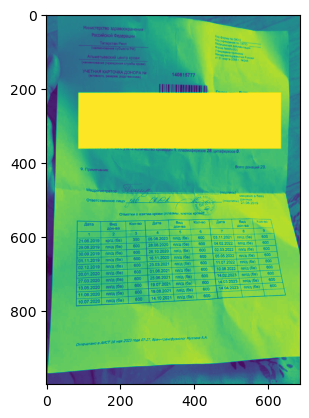

In [44]:
import cv2
import pytesseract
import numpy as np

def extract_table_from_image(image_path):
    # Load the image
    image = cv2.imread(image_path)

    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    plt.imshow(gray)

    # Apply adaptive thresholding to obtain a binary image
    _, thresholded = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    # Perform OCR to extract the text from the image
    text = pytesseract.image_to_string(thresholded)

    # Apply table detection techniques to identify the table region
    # (You can use any table detection algorithm that suits your needs)
    # For simplicity, let's assume the table is the largest contour in the image

    # Find contours in the thresholded image
    contours, _ = cv2.findContours(thresholded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Find the largest contour (presumably the table)
    table_contour = max(contours, key=cv2.contourArea)

    # Create a mask for the table contour
    table_mask = np.zeros_like(thresholded)
    cv2.drawContours(table_mask, [table_contour], 0, 255, -1)

    # Apply the mask to the grayscale image
    table_only = cv2.bitwise_and(gray, gray, mask=table_mask)

    # Perform OCR on the table region
    table_text = pytesseract.image_to_string(table_only)

    return table_text

# Path to your image file
image_path = './datasets/405/141899.jpg'

# Set the path to your Tesseract installation (change it if necessary)
pytesseract.pytesseract.tesseract_cmd = 'C:/Program Files/Tesseract-OCR/tesseract.exe'

# Extract the table from the image
table_text = extract_table_from_image(image_path)

# Print the extracted table text
print(table_text)

In [7]:
def remove_blue_elements(image_path):
    # Load the image using OpenCV
    img = cv2.imread(image_path)

    # Convert the image to the HSV color space
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    # Define the lower and upper bounds for blue color in HSV
    lower_blue = np.array([90, 50, 50])
    upper_blue = np.array([130, 255, 255])

    # Create a mask to filter out blue regions
    mask = cv2.inRange(hsv, lower_blue, upper_blue)

    # Invert the mask to preserve non-blue regions
    inverted_mask = cv2.bitwise_not(mask)

    # Apply the mask to the original image
    result = cv2.bitwise_and(img, img, mask=inverted_mask)

    return result

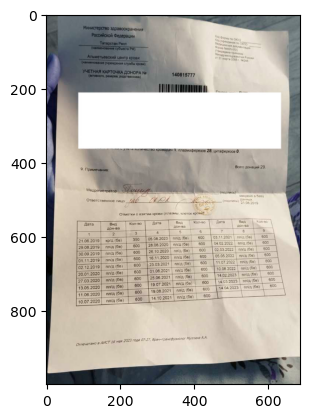

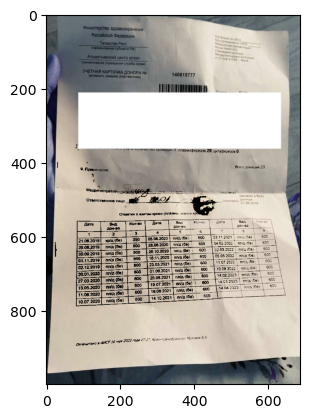

In [41]:
image_path = "D:/Python/projects/OCR_blood/datasets/405/141899.jpg"
init_image = cv2.imread(image_path)
plt.imshow(init_image)
plt.show()
result_image = remove_blue_elements(image_path)
plt.imshow(result_image)
plt.show()